<a href="https://colab.research.google.com/github/utkrasht23/RebalanceAI_241120/blob/main/MSFTPortfolio_Balancing_I_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL Stock Trading using DQN
# This notebook runs on Google Colab. It implements a custom Gym environment for single-stock trading,
# computes common indicators, trains a DQN agent, and evaluates performance.


In [1]:
!pip install gym==0.26.2 yfinance torch matplotlib --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 28.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB

In [2]:
!pip install yfinance gym matplotlib torch

/tmp/ipython-input-3-2757388.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['EMA']),
/tmp/ipython-input-3-2757388.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use floa

Episode 1/500, Total Reward: 387.59
Episode 2/500, Total Reward: 65.84
Episode 3/500, Total Reward: 178.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 4/500, Total Reward: -44.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 5/500, Total Reward: 73.76
Episode 6/500, Total Reward: 52.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 7/500, Total Reward: 10.55


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 8/500, Total Reward: 61.01


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 9/500, Total Reward: 34.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 10/500, Total Reward: -26.78


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 11/500, Total Reward: 121.85


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 12/500, Total Reward: 78.30


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 13/500, Total Reward: 21.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 14/500, Total Reward: 35.20


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 15/500, Total Reward: 54.08


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 16/500, Total Reward: -56.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 17/500, Total Reward: 56.44


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 18/500, Total Reward: 31.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 19/500, Total Reward: 7.41


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 20/500, Total Reward: 36.11


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 21/500, Total Reward: 54.45
Episode 22/500, Total Reward: -90.87


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 23/500, Total Reward: 68.20


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 24/500, Total Reward: 38.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 25/500, Total Reward: -19.50


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 26/500, Total Reward: 90.85
Episode 27/500, Total Reward: -54.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 28/500, Total Reward: 34.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 29/500, Total Reward: -12.82


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 30/500, Total Reward: 74.62


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 31/500, Total Reward: 63.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 32/500, Total Reward: 19.11


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 33/500, Total Reward: 37.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 34/500, Total Reward: -69.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 35/500, Total Reward: -38.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 36/500, Total Reward: 40.47


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 37/500, Total Reward: 60.73


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 38/500, Total Reward: 47.31


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 39/500, Total Reward: 7.72


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 40/500, Total Reward: -29.30


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 41/500, Total Reward: 79.41


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 42/500, Total Reward: 79.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 43/500, Total Reward: 45.37
Episode 44/500, Total Reward: 25.41


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 45/500, Total Reward: -5.64


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 46/500, Total Reward: 25.91


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 47/500, Total Reward: 14.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 48/500, Total Reward: 37.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 49/500, Total Reward: 54.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 50/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 51/500, Total Reward: 51.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 52/500, Total Reward: 45.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 53/500, Total Reward: -39.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 54/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 55/500, Total Reward: 14.26


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 56/500, Total Reward: 17.70


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 57/500, Total Reward: -0.05


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 58/500, Total Reward: 5.91


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 59/500, Total Reward: -7.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 60/500, Total Reward: -28.42


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 61/500, Total Reward: 181.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 62/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 63/500, Total Reward: 8.69


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 64/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 65/500, Total Reward: -12.55


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 66/500, Total Reward: 33.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 67/500, Total Reward: 85.80


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 68/500, Total Reward: -4.18


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 69/500, Total Reward: 311.54
Episode 70/500, Total Reward: -34.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 71/500, Total Reward: 79.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 72/500, Total Reward: -8.16


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 73/500, Total Reward: 163.59


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 74/500, Total Reward: 101.44


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 75/500, Total Reward: 324.89


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 76/500, Total Reward: 272.50


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 77/500, Total Reward: 169.81
Episode 78/500, Total Reward: 487.96


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 79/500, Total Reward: 274.57


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 80/500, Total Reward: 111.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 81/500, Total Reward: -56.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 82/500, Total Reward: 897.22


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 83/500, Total Reward: 109.24


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 84/500, Total Reward: 128.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 85/500, Total Reward: 1118.42


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 86/500, Total Reward: 773.89


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 87/500, Total Reward: 1770.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 88/500, Total Reward: 364.65


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 89/500, Total Reward: -76.08


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 90/500, Total Reward: 650.35


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 91/500, Total Reward: 109.74


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 92/500, Total Reward: 1129.62


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 93/500, Total Reward: 982.76
Episode 94/500, Total Reward: 810.74


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 95/500, Total Reward: 617.18


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 96/500, Total Reward: 3123.94


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 97/500, Total Reward: -163.49


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 98/500, Total Reward: 355.91


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 99/500, Total Reward: 471.01


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 100/500, Total Reward: 160.51


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 101/500, Total Reward: 3269.99


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 102/500, Total Reward: 330.80


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 103/500, Total Reward: 619.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 104/500, Total Reward: -63.64


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 105/500, Total Reward: 505.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 106/500, Total Reward: 747.83


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 107/500, Total Reward: 97.23


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 108/500, Total Reward: 461.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 109/500, Total Reward: 2885.61


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 110/500, Total Reward: 36.70
Episode 111/500, Total Reward: -154.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 112/500, Total Reward: -55.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 113/500, Total Reward: 3080.04


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 114/500, Total Reward: 216.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 115/500, Total Reward: 157.08


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 116/500, Total Reward: -226.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 117/500, Total Reward: 664.52
Episode 118/500, Total Reward: 352.50


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 119/500, Total Reward: 525.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 120/500, Total Reward: 185.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 121/500, Total Reward: 239.52
Episode 122/500, Total Reward: 3149.61


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 123/500, Total Reward: 875.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 124/500, Total Reward: 133.76


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 125/500, Total Reward: 255.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 126/500, Total Reward: 3364.96


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 127/500, Total Reward: -16.94


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 128/500, Total Reward: 3178.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 129/500, Total Reward: -462.14


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 130/500, Total Reward: 370.82


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 131/500, Total Reward: 122.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 132/500, Total Reward: 341.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 133/500, Total Reward: 324.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 134/500, Total Reward: 528.12
Episode 135/500, Total Reward: 3249.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 136/500, Total Reward: 105.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 137/500, Total Reward: 308.53


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 138/500, Total Reward: 632.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 139/500, Total Reward: 34.31


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 140/500, Total Reward: 132.76
Episode 141/500, Total Reward: 3508.74


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 142/500, Total Reward: 1729.85


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 143/500, Total Reward: 492.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 144/500, Total Reward: 3300.44


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 145/500, Total Reward: 1605.73


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 146/500, Total Reward: 242.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 147/500, Total Reward: 3089.39


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 148/500, Total Reward: -327.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 149/500, Total Reward: -209.46


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 150/500, Total Reward: 82.19


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 151/500, Total Reward: 2.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 152/500, Total Reward: 1124.11


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 153/500, Total Reward: 1117.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 154/500, Total Reward: 1803.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 155/500, Total Reward: 3532.56


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 156/500, Total Reward: 3523.74


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 157/500, Total Reward: 229.09
Episode 158/500, Total Reward: 3301.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 159/500, Total Reward: 576.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 160/500, Total Reward: 3590.53


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 161/500, Total Reward: -3.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 162/500, Total Reward: 3160.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 163/500, Total Reward: 5.18


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 164/500, Total Reward: 3409.20


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 165/500, Total Reward: 3551.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 166/500, Total Reward: 468.71


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 167/500, Total Reward: 160.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 168/500, Total Reward: 3460.70


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 169/500, Total Reward: 48.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 170/500, Total Reward: 305.09


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 171/500, Total Reward: 3656.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 172/500, Total Reward: 3520.04


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 173/500, Total Reward: 3740.91


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 174/500, Total Reward: 3469.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 175/500, Total Reward: 147.99
Episode 176/500, Total Reward: 306.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 177/500, Total Reward: 299.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 178/500, Total Reward: -8.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 179/500, Total Reward: 435.83


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 180/500, Total Reward: 367.73


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 181/500, Total Reward: 18.91
Episode 182/500, Total Reward: 9.93


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 183/500, Total Reward: 8.45


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 184/500, Total Reward: 415.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 185/500, Total Reward: 1256.92


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 186/500, Total Reward: 3515.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 187/500, Total Reward: 342.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 188/500, Total Reward: 1471.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 189/500, Total Reward: 155.89


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 190/500, Total Reward: 158.89


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 191/500, Total Reward: 3305.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 192/500, Total Reward: 461.93


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 193/500, Total Reward: 3271.86


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 194/500, Total Reward: -27.34


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 195/500, Total Reward: 3303.65


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 196/500, Total Reward: 450.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 197/500, Total Reward: 408.45


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 198/500, Total Reward: 479.07


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 199/500, Total Reward: 2978.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 200/500, Total Reward: 3729.47


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 201/500, Total Reward: 104.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 202/500, Total Reward: 282.26


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 203/500, Total Reward: -56.92


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 204/500, Total Reward: 150.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 205/500, Total Reward: 3252.61


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 206/500, Total Reward: 3345.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 207/500, Total Reward: 422.37


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 208/500, Total Reward: 58.98
Episode 209/500, Total Reward: 3172.49


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 210/500, Total Reward: 3647.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 211/500, Total Reward: 23.50


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 212/500, Total Reward: 261.64


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 213/500, Total Reward: 3039.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 214/500, Total Reward: 3519.87


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 215/500, Total Reward: 97.34


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 216/500, Total Reward: -2.87


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 217/500, Total Reward: -2.25


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 218/500, Total Reward: -15.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 219/500, Total Reward: 1848.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 220/500, Total Reward: 3003.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 221/500, Total Reward: 3031.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 222/500, Total Reward: 332.18


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 223/500, Total Reward: 573.08


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 224/500, Total Reward: 3412.13
Episode 225/500, Total Reward: 7.09


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 226/500, Total Reward: 882.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 227/500, Total Reward: 2779.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 228/500, Total Reward: 13.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 229/500, Total Reward: 3219.14


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 230/500, Total Reward: 3381.90
Episode 231/500, Total Reward: 3429.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 232/500, Total Reward: 3669.99


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 233/500, Total Reward: 2917.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 234/500, Total Reward: 2716.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 235/500, Total Reward: 3030.33


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 236/500, Total Reward: 3209.66


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 237/500, Total Reward: 3317.59


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 238/500, Total Reward: 3172.99


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 239/500, Total Reward: 3408.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 240/500, Total Reward: 3713.04


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 241/500, Total Reward: 2876.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 242/500, Total Reward: 2943.46


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 243/500, Total Reward: 3409.64


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 244/500, Total Reward: 3155.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 245/500, Total Reward: 3232.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 246/500, Total Reward: 3053.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 247/500, Total Reward: 3016.81


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 248/500, Total Reward: 3153.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 249/500, Total Reward: 3536.15
Episode 250/500, Total Reward: 3512.23


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 251/500, Total Reward: -4.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 252/500, Total Reward: 3228.87


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 253/500, Total Reward: 3118.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 254/500, Total Reward: 3589.72


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 255/500, Total Reward: 3201.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 256/500, Total Reward: 2540.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 257/500, Total Reward: 3398.44
Episode 258/500, Total Reward: 3449.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 259/500, Total Reward: 33.83


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 260/500, Total Reward: 3659.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 261/500, Total Reward: 3102.53


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 262/500, Total Reward: 3529.21
Episode 263/500, Total Reward: 3467.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 264/500, Total Reward: 18.35


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 265/500, Total Reward: 2900.96


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 266/500, Total Reward: 3412.98


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 267/500, Total Reward: 3579.49


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 268/500, Total Reward: 3581.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 269/500, Total Reward: 3419.92


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 270/500, Total Reward: 3477.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 271/500, Total Reward: 3514.99


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 272/500, Total Reward: 3419.59


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 273/500, Total Reward: 3429.87


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 274/500, Total Reward: 3417.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 275/500, Total Reward: 3593.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 276/500, Total Reward: 3061.81
Episode 277/500, Total Reward: 3448.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 278/500, Total Reward: 3657.93


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 279/500, Total Reward: 3403.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 280/500, Total Reward: 3646.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 281/500, Total Reward: 3423.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 282/500, Total Reward: 2966.90
Episode 283/500, Total Reward: 3536.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 284/500, Total Reward: 3009.07


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 285/500, Total Reward: 3387.23


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 286/500, Total Reward: 3513.34


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 287/500, Total Reward: 3424.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 288/500, Total Reward: 2975.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 289/500, Total Reward: 3414.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 290/500, Total Reward: 3298.18


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 291/500, Total Reward: 3632.41


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 292/500, Total Reward: 2971.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 293/500, Total Reward: 3007.93


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 294/500, Total Reward: 3054.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 295/500, Total Reward: 728.62


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 296/500, Total Reward: 2999.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 297/500, Total Reward: 2513.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 298/500, Total Reward: 14.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 299/500, Total Reward: 1565.69


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 300/500, Total Reward: 198.64


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 301/500, Total Reward: 1641.55


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 302/500, Total Reward: 3728.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 303/500, Total Reward: 1193.84
Episode 304/500, Total Reward: 3738.83


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 305/500, Total Reward: 3650.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 306/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 307/500, Total Reward: 1320.38


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 308/500, Total Reward: 919.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 309/500, Total Reward: 1134.97


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 310/500, Total Reward: 83.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 311/500, Total Reward: 1.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 312/500, Total Reward: 1336.75


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 313/500, Total Reward: 1408.65


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 314/500, Total Reward: 1309.78


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 315/500, Total Reward: 1.37


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 316/500, Total Reward: 1022.33


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 317/500, Total Reward: 905.83


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 318/500, Total Reward: 2.50


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 319/500, Total Reward: -0.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 320/500, Total Reward: 6.97


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 321/500, Total Reward: 1256.98


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 322/500, Total Reward: 1363.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 323/500, Total Reward: 1310.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 324/500, Total Reward: 1389.01
Episode 325/500, Total Reward: 1322.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 326/500, Total Reward: 23.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 327/500, Total Reward: 1321.19


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 328/500, Total Reward: 955.51


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 329/500, Total Reward: 0.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 330/500, Total Reward: 3674.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 331/500, Total Reward: 1335.05
Episode 332/500, Total Reward: 1551.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 333/500, Total Reward: 10.45


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 334/500, Total Reward: 1305.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 335/500, Total Reward: 1237.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 336/500, Total Reward: 875.78


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 337/500, Total Reward: 1255.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 338/500, Total Reward: 1208.72


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 339/500, Total Reward: 41.89


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 340/500, Total Reward: 1132.17


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 341/500, Total Reward: 1216.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 342/500, Total Reward: 1140.56


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 343/500, Total Reward: 3246.66


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 344/500, Total Reward: 3659.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 345/500, Total Reward: 3357.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 346/500, Total Reward: 3308.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 347/500, Total Reward: 3256.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 348/500, Total Reward: 3649.73


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 349/500, Total Reward: 3444.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 350/500, Total Reward: 3372.72
Episode 351/500, Total Reward: 3243.94


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 352/500, Total Reward: 149.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 353/500, Total Reward: 893.07


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 354/500, Total Reward: 1081.92


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 355/500, Total Reward: 3327.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 356/500, Total Reward: 1194.79
Episode 357/500, Total Reward: 3616.74
Episode 358/500, Total Reward: 3255.88


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 359/500, Total Reward: 3477.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 360/500, Total Reward: 3756.19


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 361/500, Total Reward: 3775.68


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 362/500, Total Reward: 3772.28


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 363/500, Total Reward: 3591.90


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 364/500, Total Reward: 3670.72


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 365/500, Total Reward: 3637.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 366/500, Total Reward: 3657.39


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 367/500, Total Reward: 3753.85


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 368/500, Total Reward: 3676.20


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 369/500, Total Reward: 3644.79


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 370/500, Total Reward: 3760.25


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 371/500, Total Reward: 3764.41


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 372/500, Total Reward: 3642.35


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 373/500, Total Reward: 3741.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 374/500, Total Reward: 3742.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 375/500, Total Reward: 3790.41
Episode 376/500, Total Reward: 3773.57


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 377/500, Total Reward: 3657.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 378/500, Total Reward: 3595.63


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 379/500, Total Reward: 3392.02


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 380/500, Total Reward: 3639.21


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 381/500, Total Reward: 3591.66
Episode 382/500, Total Reward: 3648.94


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 383/500, Total Reward: 3761.37


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 384/500, Total Reward: 3775.24


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 385/500, Total Reward: 3688.11


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 386/500, Total Reward: 3744.13


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 387/500, Total Reward: 3594.76


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 388/500, Total Reward: 3785.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 389/500, Total Reward: 3676.96


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 390/500, Total Reward: 3716.66


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 391/500, Total Reward: 3740.97


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 392/500, Total Reward: 3785.78


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 393/500, Total Reward: 3650.78


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 394/500, Total Reward: 3773.67


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 395/500, Total Reward: 3845.82


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 396/500, Total Reward: 3734.07


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 397/500, Total Reward: 3684.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 398/500, Total Reward: 3847.69


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 399/500, Total Reward: 3854.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 400/500, Total Reward: 3843.00
Episode 401/500, Total Reward: 3582.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 402/500, Total Reward: 3719.65


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 403/500, Total Reward: 3827.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 404/500, Total Reward: 3789.50
Episode 405/500, Total Reward: 3726.25


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 406/500, Total Reward: 3861.69
Episode 407/500, Total Reward: 3592.04


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 408/500, Total Reward: 3676.01


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 409/500, Total Reward: 3724.22


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 410/500, Total Reward: 3728.61


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 411/500, Total Reward: 3638.24


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 412/500, Total Reward: 3751.39


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 413/500, Total Reward: 3805.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 414/500, Total Reward: 3754.16


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 415/500, Total Reward: 3769.65


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 416/500, Total Reward: 3719.15
Episode 417/500, Total Reward: 3810.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 418/500, Total Reward: 3713.60


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 419/500, Total Reward: 3697.63


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 420/500, Total Reward: 3530.22


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 421/500, Total Reward: 3720.24


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 422/500, Total Reward: 3718.14


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 423/500, Total Reward: 3720.71
Episode 424/500, Total Reward: 3854.19


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 425/500, Total Reward: 3689.59


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 426/500, Total Reward: 3794.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 427/500, Total Reward: 3770.31


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 428/500, Total Reward: 3849.52


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 429/500, Total Reward: 2457.01


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 430/500, Total Reward: 3765.57


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 431/500, Total Reward: 3739.72


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 432/500, Total Reward: 3742.32


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 433/500, Total Reward: 3749.48


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 434/500, Total Reward: 3771.33


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 435/500, Total Reward: 3742.43


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 436/500, Total Reward: 3684.58


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 437/500, Total Reward: 3832.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 438/500, Total Reward: 3735.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 439/500, Total Reward: 3688.84
Episode 440/500, Total Reward: 3715.92


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 441/500, Total Reward: 3675.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 442/500, Total Reward: 3734.03


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 443/500, Total Reward: 3765.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 444/500, Total Reward: 3688.33


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 445/500, Total Reward: 3775.25
Episode 446/500, Total Reward: 3800.80


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 447/500, Total Reward: 3692.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 448/500, Total Reward: 3769.99


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 449/500, Total Reward: 3652.05


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 450/500, Total Reward: 3713.39


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 451/500, Total Reward: 3662.71


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 452/500, Total Reward: 3678.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 453/500, Total Reward: 3716.70


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 454/500, Total Reward: 3761.15


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 455/500, Total Reward: 3691.64
Episode 456/500, Total Reward: 3714.24


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 457/500, Total Reward: 3631.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 458/500, Total Reward: 3862.77


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 459/500, Total Reward: 3760.37


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 460/500, Total Reward: 3742.00


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 461/500, Total Reward: 3658.74


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 462/500, Total Reward: 3673.49
Episode 463/500, Total Reward: 3727.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 464/500, Total Reward: 3674.71


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 465/500, Total Reward: 3628.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 466/500, Total Reward: 3659.86


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 467/500, Total Reward: 3571.30


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 468/500, Total Reward: 3668.34


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 469/500, Total Reward: 3640.36


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 470/500, Total Reward: 3660.71


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 471/500, Total Reward: 3544.75


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 472/500, Total Reward: 3672.42


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 473/500, Total Reward: 3376.71


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 474/500, Total Reward: 3650.19


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 475/500, Total Reward: 3599.29


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 476/500, Total Reward: 3634.84


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 477/500, Total Reward: 3561.91
Episode 478/500, Total Reward: 3341.75


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 479/500, Total Reward: 3321.45


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 480/500, Total Reward: 3557.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 481/500, Total Reward: 3383.85


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 482/500, Total Reward: 3308.22


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 483/500, Total Reward: 3392.42


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 484/500, Total Reward: 3452.06


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 485/500, Total Reward: 3432.54


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 486/500, Total Reward: 3335.56


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 487/500, Total Reward: 3508.95


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 488/500, Total Reward: 3470.42


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 489/500, Total Reward: 3444.81


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 490/500, Total Reward: 3510.16


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 491/500, Total Reward: 3259.66


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 492/500, Total Reward: 3428.40


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 493/500, Total Reward: 3763.49


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 494/500, Total Reward: 3693.70


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 495/500, Total Reward: 3302.73


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 496/500, Total Reward: 3714.16


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 497/500, Total Reward: 3692.76


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 498/500, Total Reward: 3524.12


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 499/500, Total Reward: 3766.04


/tmp/ipython-input-3-2757388.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close']) # Ensure price is a float
/tmp/ipython-input-3-2757388.py:89: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Ca

Episode 500/500, Total Reward: 3620.77


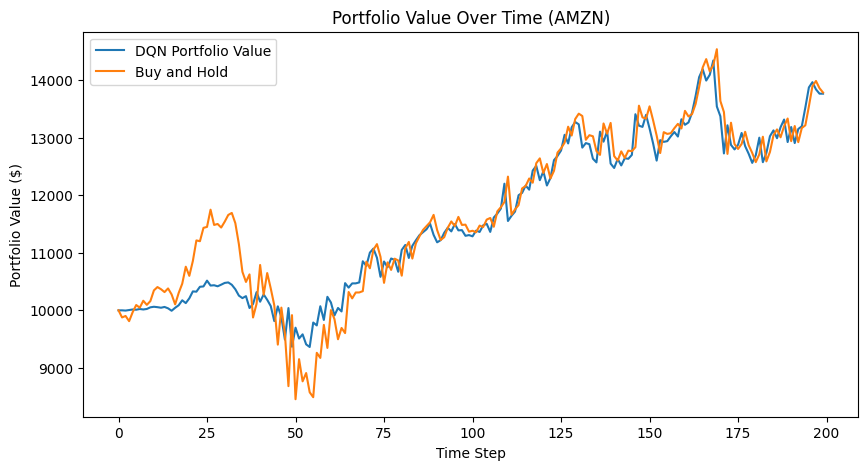

In [3]:
!pip install yfinance gym matplotlib torch
import yfinance as yf
import numpy as np
import pandas as pd
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
from collections import namedtuple, deque
import random
import matplotlib.pyplot as plt

def fetch_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    return df

# Add indicators: SMA, EMA, RSI, MACD
def add_indicators(df, window_sma=20, window_ema=21, window_rsi=12):
    df['SMA'] = df['Close'].rolling(window=window_sma).mean()
    df['EMA'] = df['Close'].ewm(span=window_ema, adjust=False).mean()

    # RSI calculation
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=window_rsi).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window_rsi).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26

    df.bfill(inplace=True)
    return df

class TradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=10000, max_steps=200):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = float(initial_balance)
        self.max_steps = min(max_steps, len(df) - 1)

        # Action space
        self.action_space = spaces.Discrete(3)

        # Observation: [close, SMA, EMA, RSI, MACD, holdings, cash]
        obs_low = np.array([0, 0, 0, 0, -np.inf, 0, 0], dtype=np.float32)
        obs_high = np.array([np.inf, np.inf, np.inf, 100, np.inf, np.inf, np.inf], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

    def reset(self):
        self.balance = float(self.initial_balance)
        self.net_worth = float(self.initial_balance)
        self.shares_held = 0
        self.current_step = 0
        return self._get_obs()

    def _get_obs(self):
        row = self.df.loc[self.current_step]
        return np.array([
            float(row['Close']),
            float(row['SMA']),
            float(row['EMA']),
            float(row['RSI']),
            float(row['MACD']),
            float(self.shares_held),
            float(self.balance)
        ], dtype=np.float32)

    def step(self, action):
        row = self.df.loc[self.current_step]
        price = float(row['Close']) # Ensure price is a float
        prev_net_worth = self.net_worth

        if action == 1 and self.balance >= price:
            self.shares_held += 1
            self.balance -= price
        elif action == 2 and self.shares_held > 0:
            self.shares_held -= 1
            self.balance += price

        self.current_step += 1
        done = self.current_step >= self.max_steps
        self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close']) # Ensure next_price is a float
        reward = self.net_worth - prev_net_worth

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Balance: {self.balance:.2f}, Shares: {self.shares_held}, Net Worth: {self.net_worth:.2f}")

class DQN(nn.Module):
    def __init__(self, input_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Hyperparameters
episode_count = 500
nb_steps = 200
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 500
batch_size = 64
target_update = 10

# Fetch and prepare data (✔ Microsoft)
df = fetch_data('MSFT', '2020-01-01', '2021-01-01')
df = add_indicators(df)

env = TradingEnv(df, initial_balance=10000, max_steps=200)

# Init networks and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
memory = ReplayBuffer()

steps_done = 0

def select_action(state):
    global steps_done
    eps_threshold = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * steps_done / epsilon_decay)
    steps_done += 1
    if random.random() < eps_threshold:
        return random.randrange(env.action_space.n)
    with torch.no_grad():
        state_v = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
        q_values = policy_net(state_v)
        return q_values.argmax().item()

for episode in range(1, episode_count + 1):
    state = env.reset()
    total_reward = 0
    for t in range(nb_steps):
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)
        memory.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(memory) >= batch_size:
            transitions = memory.sample(batch_size)
            batch = Transition(*zip(*transitions))

            state_batch = torch.tensor(batch.state, dtype=torch.float32).to(device)
            action_batch = torch.tensor(batch.action).unsqueeze(1).to(device)
            reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
            next_state_batch = torch.tensor(batch.next_state, dtype=torch.float32).to(device)
            done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

            q_values = policy_net(state_batch).gather(1, action_batch)
            next_q_values = target_net(next_state_batch).max(1)[0].detach().unsqueeze(1)
            expected_q = reward_batch + (gamma * next_q_values * (1 - done_batch))

            loss = nn.MSELoss()(q_values, expected_q)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if done:
            break

    if episode % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print(f"Episode {episode}/{episode_count}, Total Reward: {total_reward:.2f}")

# Evaluation
state = env.reset()
values = []
s = state
for _ in range(env.max_steps):
    action = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env.step(action)
    values.append(env.net_worth)
    if done:
        break

# Buy and hold baseline
bh_prices = df['Close'].iloc[:len(values)].values
bh_values = bh_prices / bh_prices[0] * env.initial_balance

plt.figure(figsize=(10, 5))
plt.plot(range(len(values)), values, label='DQN Portfolio Value')
plt.plot(range(len(bh_values)), bh_values, label='Buy and Hold')
plt.legend()
plt.title('Portfolio Value Over Time (AMZN)')
plt.xlabel('Time Step')
plt.ylabel('Portfolio Value ($)')
plt.show()

/tmp/ipython-input-3-2757388.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['EMA']),
/tmp/ipython-input-3-2757388.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use floa

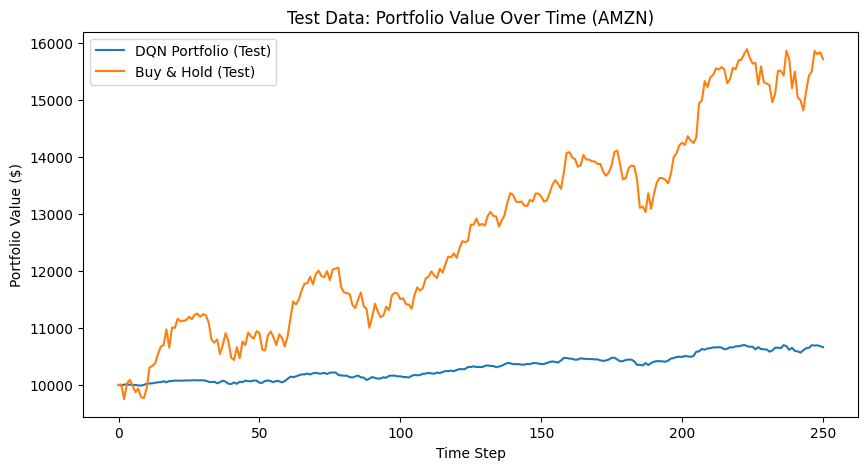

In [4]:
# Fetch and prepare unseen test data for Microsoft
df_test = fetch_data('MSFT', '2021-01-02', '2022-01-01')
df_test = add_indicators(df_test, window_sma=20, window_ema=21, window_rsi=12)

# Create new test environment
env_test = TradingEnv(df_test, initial_balance=10000, max_steps=len(df_test) - 1)

# Run greedy policy on test environment
state = env_test.reset()
values_test = []
s = state
for _ in range(env_test.max_steps):
    action = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env_test.step(action)
    values_test.append(env_test.net_worth)
    if done:
        break

# Buy & Hold baseline for test period
bh_test = df_test['Close'].iloc[:len(values_test)].values
bh_values_test = bh_test / bh_test[0] * env_test.initial_balance

# Plot test performance
plt.figure(figsize=(10, 5))
plt.plot(range(len(values_test)), values_test, label='DQN Portfolio (Test)')
plt.plot(range(len(bh_values_test)), bh_values_test, label='Buy & Hold (Test)')
plt.legend()
plt.title('Test Data: Portfolio Value Over Time (AMZN)')
plt.xlabel('Time Step')
plt.ylabel('Portfolio Value ($)')
plt.show()

# This model is very conservative and holds which should be improved you should work upon that ignore all the code below


In [5]:
actions = []
state = env_test.reset()
for _ in range(env_test.max_steps):
    action = policy_net(torch.tensor(state, dtype=torch.float32)
                        .unsqueeze(0).to(device)).argmax().item()
    actions.append(action)
    state, _, done, _ = env_test.step(action)
    if done: break

print("Action counts:", {a: actions.count(a) for a in set(actions)})


/tmp/ipython-input-3-2757388.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3-2757388.py:67: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['SMA']),
/tmp/ipython-input-3-2757388.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['EMA']),
/tmp/ipython-input-3-2757388.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['RSI']),
/tmp/ipython-input-3-2757388.py:70: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['MACD']

Action counts: {0: 245, 1: 6}


#Add a small penalty for each trade to discourage inaction‑only policies, or a bonus for correctly timed trades

[*********************100%***********************]  1 of 1 completed


Episode 1/300, Total Reward: 377.55
Episode 2/300, Total Reward: 659.42
Episode 3/300, Total Reward: 404.59
Episode 4/300, Total Reward: 86.10
Episode 5/300, Total Reward: 133.16
Episode 6/300, Total Reward: 512.41
Episode 7/300, Total Reward: 111.32
Episode 8/300, Total Reward: 114.26
Episode 9/300, Total Reward: 26.22
Episode 10/300, Total Reward: -29.89
Episode 11/300, Total Reward: 113.22
Episode 12/300, Total Reward: 223.39
Episode 13/300, Total Reward: 67.98
Episode 14/300, Total Reward: 165.79
Episode 15/300, Total Reward: 78.94
Episode 16/300, Total Reward: 270.71
Episode 17/300, Total Reward: 373.45
Episode 18/300, Total Reward: 150.28
Episode 19/300, Total Reward: 201.06
Episode 20/300, Total Reward: 249.59
Episode 21/300, Total Reward: 0.06
Episode 22/300, Total Reward: 133.54
Episode 23/300, Total Reward: 42.79
Episode 24/300, Total Reward: 90.89
Episode 25/300, Total Reward: 142.77
Episode 26/300, Total Reward: 51.97
Episode 27/300, Total Reward: 63.28
Episode 28/300, Tota

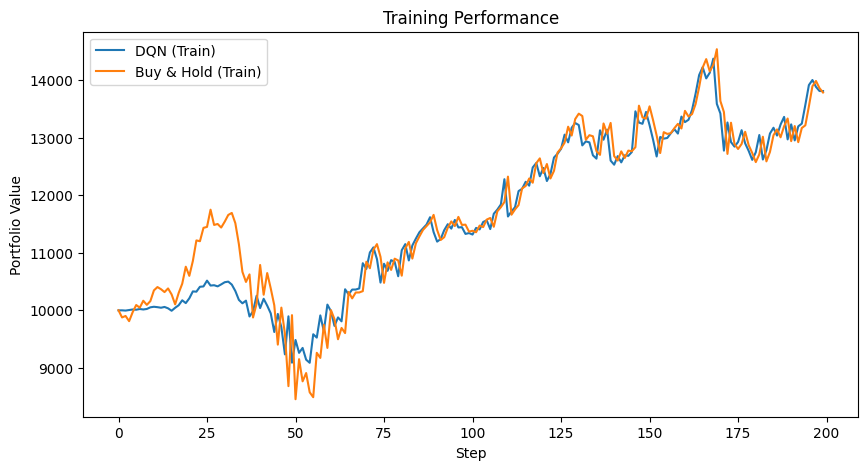

[*********************100%***********************]  1 of 1 completed


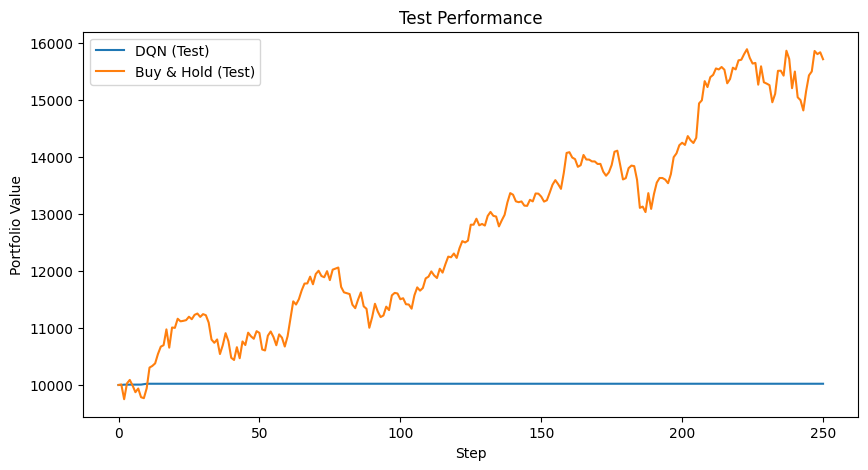

In [6]:
# Install dependencies
!pip install gym==0.26.2 yfinance torch matplotlib --quiet

import numpy as np
import pandas as pd
import gym
from gym import spaces
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Data Fetching and Indicator Computation
def fetch_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    return df

def add_indicators(df, window_sma=20, window_ema=21, window_rsi=12):
    df['SMA'] = df['Close'].rolling(window=window_sma).mean()
    df['EMA'] = df['Close'].ewm(span=window_ema, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=window_rsi).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window_rsi).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df.bfill(inplace=True)
    df.ffill(inplace=True)
    return df

# 3. Define Trading Environment with Reward Shaping
class TradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=10000, max_steps=200, trade_penalty=0.1):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = float(initial_balance)
        self.max_steps = min(int(max_steps), len(df) - 1)
        self.trade_penalty = trade_penalty

        self.action_space = spaces.Discrete(3)
        obs_low = np.array([0, 0, 0, 0, -np.inf, 0, 0], dtype=np.float32)
        obs_high = np.array([np.inf, np.inf, np.inf, 100, np.inf, np.inf, np.inf], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

    def reset(self):
        self.balance = float(self.initial_balance)
        self.net_worth = float(self.initial_balance)
        self.shares_held = 0
        self.current_step = 0  # ensure it's an integer
        return self._get_obs()

    def _get_obs(self):
        step = int(min(self.current_step, len(self.df) - 1))
        row = self.df.iloc[step]  # safer than loc when index is not integer
        obs = [
            float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) and not row['Close'].empty and not pd.isna(row['Close'].iloc[0]) else (float(row['Close']) if not pd.isna(row['Close']) else 0.0),
            float(row['SMA'].iloc[0]) if isinstance(row['SMA'], pd.Series) and not row['SMA'].empty and not pd.isna(row['SMA'].iloc[0]) else (float(row['SMA']) if not pd.isna(row['SMA']) else 0.0),
            float(row['EMA'].iloc[0]) if isinstance(row['EMA'], pd.Series) and not row['EMA'].empty and not pd.isna(row['EMA'].iloc[0]) else (float(row['EMA']) if not pd.isna(row['EMA']) else 0.0),
            float(row['RSI'].iloc[0]) if isinstance(row['RSI'], pd.Series) and not row['RSI'].empty and not pd.isna(row['RSI'].iloc[0]) else (float(row['RSI']) if not pd.isna(row['RSI']) else 0.0),
            float(row['MACD'].iloc[0]) if isinstance(row['MACD'], pd.Series) and not row['MACD'].empty and not pd.isna(row['MACD'].iloc[0]) else (float(row['MACD']) if not pd.isna(row['MACD']) else 0.0),
            float(self.shares_held),
            float(self.balance)
        ]
        return np.array(obs, dtype=np.float32)

    def step(self, action):
        step = int(min(self.current_step, len(self.df) - 1))
        row = self.df.iloc[step]
        price = float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) and not row['Close'].empty else float(row['Close'])
        prev_net_worth = self.net_worth
        trade_cost = 0.0

        if action == 1 and self.balance >= price:
            self.shares_held += 1
            self.balance -= price
            trade_cost = self.trade_penalty
        elif action == 2 and self.shares_held > 0:
            self.shares_held -= 1
            self.balance += price
            trade_cost = self.trade_penalty

        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_step = int(min(self.current_step, len(self.df) - 1))
        self.net_worth = self.balance + self.shares_held * (float(self.df.loc[next_step]['Close'].iloc[0]) if isinstance(self.df.loc[next_step]['Close'], pd.Series) and not self.df.loc[next_step]['Close'].empty else float(self.df.loc[next_step]['Close'])) # Ensure next_price is a float
        reward = (self.net_worth - prev_net_worth) - trade_cost
        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Balance: {self.balance:.2f}, Shares: {self.shares_held}, Net Worth: {self.net_worth:.2f}")


# 4. DQN Agent
class DQN(nn.Module):
    def __init__(self, input_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Replay Buffer
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# 5. Training Loop
episode_count = 300
nb_steps = 200
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 500
batch_size = 64
target_update = 10

df = fetch_data('MSFT', '2020-01-01', '2021-01-01')
df = add_indicators(df)
env = TradingEnv(df, initial_balance=10000, max_steps=200, trade_penalty=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
memory = ReplayBuffer()
steps_done = 0

def select_action(state):
    global steps_done
    eps = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * steps_done / epsilon_decay)
    steps_done += 1
    if random.random() < eps:
        return random.randrange(env.action_space.n)
    with torch.no_grad():
        state_v = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
        return policy_net(state_v).argmax().item()

for episode in range(1, episode_count + 1):
    state = env.reset()
    total_reward = 0
    for t in range(nb_steps):
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)
        memory.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if len(memory) >= batch_size:
            batch = Transition(*zip(*random.sample(memory.memory, batch_size)))
            s_b = torch.tensor(batch.state, dtype=torch.float32).to(device)
            a_b = torch.tensor(batch.action).unsqueeze(1).to(device)
            r_b = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
            ns_b = torch.tensor(batch.next_state, dtype=torch.float32).to(device)
            d_b = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)
            q = policy_net(s_b).gather(1, a_b)
            qn = target_net(ns_b).max(1)[0].detach().unsqueeze(1)
            y = r_b + gamma * qn * (1 - d_b)
            loss = nn.MSELoss()(q, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if done:
            break
    if episode % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print(f"Episode {episode}/{episode_count}, Total Reward: {total_reward:.2f}")

# 6. Evaluation on Training Data
state = env.reset()
values = []
s = state
for _ in range(env.max_steps):
    a = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env.step(a)
    values.append(env.net_worth)
    if done:
        break

plt.figure(figsize=(10, 5))
plt.plot(range(len(values)), values, label='DQN (Train)')
bh = df['Close'].iloc[:len(values)].values
bhv = bh / bh[0] * env.initial_balance
plt.plot(range(len(bhv)), bhv, label='Buy & Hold (Train)')
plt.legend()
plt.title('Training Performance')
plt.xlabel('Step')
plt.ylabel('Portfolio Value')
plt.show()

# 7. Evaluation on Test Data
df_test = fetch_data('MSFT', '2021-01-02', '2022-01-01')
df_test = add_indicators(df_test)
env_test = TradingEnv(df_test, initial_balance=10000, max_steps=len(df_test) - 1, trade_penalty=0.1)

state = env_test.reset()
values_test = []
s = state
for _ in range(env_test.max_steps):
    a = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env_test.step(a)
    values_test.append(env_test.net_worth)
    if done:
        break

plt.figure(figsize=(10, 5))
plt.plot(range(len(values_test)), values_test, label='DQN (Test)')
bht = df_test['Close'].iloc[:len(values_test)].values
bhtv = bht / bht[0] * env_test.initial_balance
plt.plot(range(len(bhtv)), bhtv, label='Buy & Hold (Test)')
plt.legend()
plt.title('Test Performance')
plt.xlabel('Step')
plt.ylabel('Portfolio Value')
plt.show()

/tmp/ipython-input-7-733997373.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Episode 1/500, Total Reward: 181.76
Episode 2/500, Total Reward: 289.50
Episode 3/500, Total Reward: 207.97
Episode 4/500, Total Reward: 182.13
Episode 5/500, Total Reward: 305.01
Episode 6/500, Total Reward: 205.50
Episode 7/500, Total Reward: 661.65
Episode 8/500, Total Reward: 156.44
Episode 9/500, Total Reward: 124.64
Episode 10/500, Total Reward: -2.09
Episode 11/500, Total Reward: 259.71
Episode 12/500, Total Reward: 613.96
Episode 13/500, Total Reward: 521.37
Episode 14/500, Total Reward: 420.97
Episode 15/500, Total Reward: 601.54
Episode 16/500, Total Reward: 1006.09
Episode 17/500, Total Reward: 378.42
Episode 18/500, Total Reward: 379.22
Episode 19/500, Total Reward: 1390.59
Episode 20/500, Total Reward: 600.86
Episode 21/500, Total Reward: 720.91
Episode 22/500, Total Reward: 116.24
Episode 23/500, Total Reward: 51.15
Episode 24/500, Total Reward: 637.84
Episode 25/500, Total Reward: 519.71
Episode 26/500, Total Reward: 407.43
Episode 27/500, Total Reward: 633.45
Episode 28

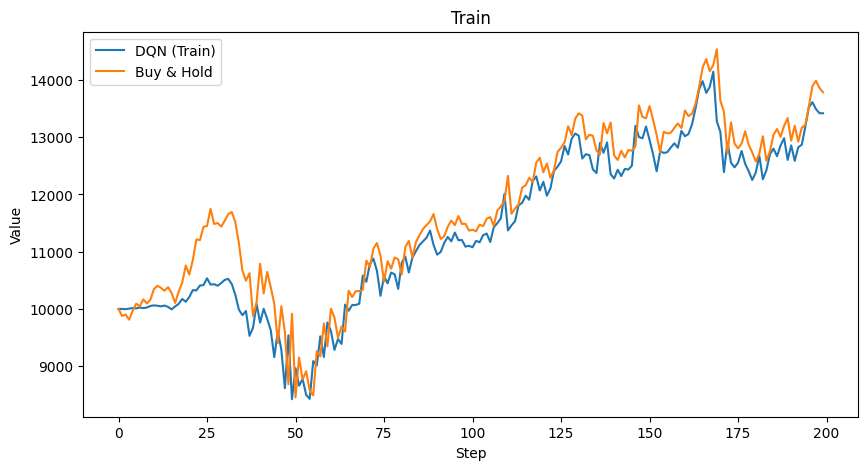

[*********************100%***********************]  1 of 1 completed


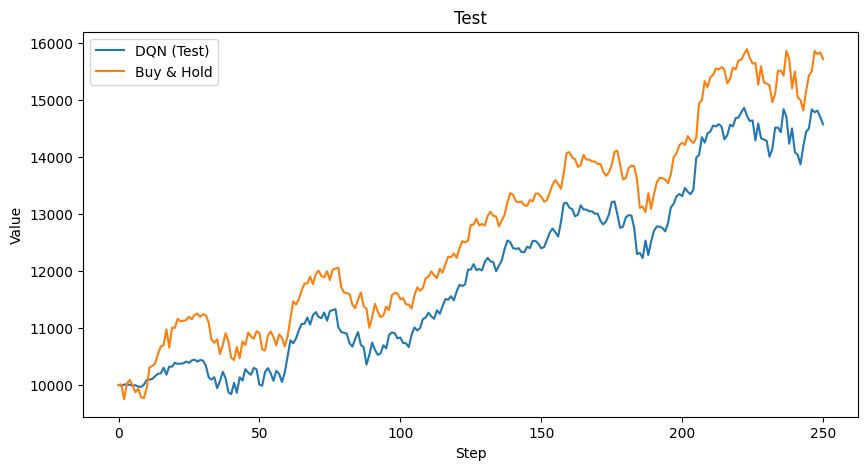

In [7]:
# Full DQN Trading Model with Microsoft (MSFT), Custom Indicators, Reward Shaping



# ------------------------
# 1. Fetch Data
# ------------------------
def fetch_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    return df

# ------------------------
# 2. Add Technical Indicators
# ------------------------
def add_indicators(df, window_sma=20, window_ema=21, window_rsi=12):
    df['SMA'] = df['Close'].rolling(window=window_sma).mean()
    df['EMA'] = df['Close'].ewm(span=window_ema, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=window_rsi).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window_rsi).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Ret1'] = df['Close'].pct_change(1)
    df['Ret5'] = df['Close'].pct_change(5)
    df['VolAvg'] = df['Volume'].rolling(window=5).mean()
    df.bfill(inplace=True)
    return df

# ------------------------
# 3. Trading Environment
# ------------------------
class TradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000, max_steps=200, bonus=0.1):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.max_steps = min(max_steps, len(df) - 1)
        self.bonus = bonus
        self.action_space = spaces.Discrete(3)  # hold, buy, sell
        obs_low = np.array([0, 0, 0, 0, -1, -1, 0, 0, 0], dtype=np.float32)
        obs_high = np.array([np.inf, np.inf, np.inf, 100, 1, 1, np.inf, np.inf, np.inf], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

    def reset(self):
        self.balance = float(self.initial_balance)
        self.net_worth = float(self.initial_balance)
        self.shares_held = 0
        self.current_step = 0
        return self._get_obs()

    def _get_obs(self):
        row = self.df.loc[self.current_step]
        return np.array([
            float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) else float(row['Close']),
            float(row['SMA'].iloc[0]) if isinstance(row['SMA'], pd.Series) else float(row['SMA']),
            float(row['EMA'].iloc[0]) if isinstance(row['EMA'], pd.Series) else float(row['EMA']),
            float(row['RSI'].iloc[0]) if isinstance(row['RSI'], pd.Series) else float(row['RSI']),
            float(row['Ret1'].iloc[0]) if isinstance(row['Ret1'], pd.Series) else float(row['Ret1']),
            float(row['Ret5'].iloc[0]) if isinstance(row['Ret5'], pd.Series) else float(row['Ret5']),
            float(row['VolAvg'].iloc[0]) if isinstance(row['VolAvg'], pd.Series) else float(row['VolAvg']),
            float(self.shares_held),
            float(self.balance)
        ], dtype=np.float32)

    def step(self, action):
        row = self.df.loc[self.current_step]
        price = float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) else float(row['Close'])
        prev_net_worth = self.net_worth

        if action == 1 and self.balance >= price:
            self.shares_held += 1
            self.balance -= price
        elif action == 2 and self.shares_held > 0:
            self.shares_held -= 1
            self.balance += price

        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_price = float(self.df.loc[self.current_step]['Close'].iloc[0]) if isinstance(self.df.loc[self.current_step]['Close'], pd.Series) else float(self.df.loc[self.current_step]['Close'])
        self.net_worth = self.balance + self.shares_held * next_price

        reward = self.net_worth - prev_net_worth
        if action == 1 and next_price > price:
            reward += self.bonus
        if action == 2 and next_price < price:
            reward += self.bonus

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Balance: {self.balance:.2f}, Shares: {self.shares_held}, Net Worth: {self.net_worth:.2f}")

# ------------------------
# 4. DQN Agent
# ------------------------
class DQN(nn.Module):
    def __init__(self, input_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))
class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.memory = deque(maxlen=capacity)
    def push(self, *args): self.memory.append(Transition(*args))
    def sample(self, bs): return random.sample(self.memory, bs)
    def __len__(self): return len(self.memory)

# ------------------------
# 5. Training
# ------------------------
episode_count = 500
nb_steps = 200
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.05
epsilon_decay = 2000
batch_size = 64
target_update = 10

df = fetch_data('MSFT', '2020-01-01', '2021-01-01')
df = add_indicators(df)
env = TradingEnv(df, bonus=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
memory = ReplayBuffer()
steps_done = 0

def select_action(state):
    global steps_done
    eps = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * steps_done / epsilon_decay)
    steps_done += 1
    if random.random() < eps:
        return random.randrange(env.action_space.n)
    with torch.no_grad():
        return policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()

for ep in range(1, episode_count + 1):
    state = env.reset()
    total_reward = 0
    for _ in range(nb_steps):
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)
        memory.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(memory) >= batch_size:
            batch = Transition(*zip(*memory.sample(batch_size)))
            s_b = torch.tensor(batch.state, dtype=torch.float32).to(device)
            a_b = torch.tensor(batch.action).unsqueeze(1).to(device)
            r_b = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
            ns_b = torch.tensor(batch.next_state, dtype=torch.float32).to(device)
            d_b = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)
            q = policy_net(s_b).gather(1, a_b)
            qn = target_net(ns_b).max(1)[0].detach().unsqueeze(1)
            y = r_b + gamma * qn * (1.0 - d_b)
            loss = nn.MSELoss()(q, y)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
        if done: break
    if ep % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print(f"Episode {ep}/{episode_count}, Total Reward: {total_reward:.2f}")

# ------------------------
# 6. Evaluation on Train
# ------------------------
state = env.reset(); vals = []
for _ in range(env.max_steps):
    a = policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    state, _, done, _ = env.step(a); vals.append(env.net_worth)
    if done: break
plt.figure(figsize=(10,5))
plt.plot(vals, label='DQN (Train)')
bh = df['Close'].iloc[:len(vals)].values; bhv = bh / bh[0] * env.initial_balance
plt.plot(bhv, label='Buy & Hold'); plt.legend(); plt.title('Train'); plt.xlabel('Step'); plt.ylabel('Value'); plt.show()

# ------------------------
# 7. Evaluation on Test
# ------------------------
df_test = fetch_data('MSFT', '2021-01-02', '2022-01-01')
df_test = add_indicators(df_test)
env_test = TradingEnv(df_test, initial_balance=10000, max_steps=len(df_test)-1, bonus=0.1)

state = env_test.reset(); test_vals = []
for _ in range(env_test.max_steps):
    a = policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    state, _, done, _ = env_test.step(a); test_vals.append(env_test.net_worth)
    if done: break
plt.figure(figsize=(10,5))
plt.plot(test_vals, label='DQN (Test)')
bht = df_test['Close'].iloc[:len(test_vals)].values; bhtv = bht / bht[0] * env_test.initial_balance
plt.plot(bhtv, label='Buy & Hold'); plt.legend(); plt.title('Test'); plt.xlabel('Step'); plt.ylabel('Value'); plt.show()

/tmp/ipython-input-7-733997373.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


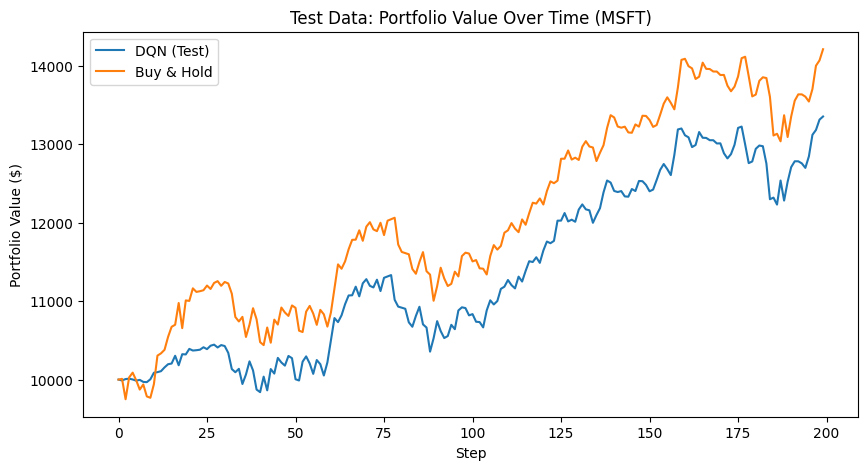

In [8]:
# ## 7. Evaluation on Test Data

# %%
df_test = fetch_data('MSFT', '2021-01-02', '2023-01-01')  # Changed stock from AAPL to MSFT
df_test = add_indicators(df_test)  # Add all indicators
env_test = TradingEnv(df_test, bonus=0.1)  # Keep same reward shaping bonus

# Run greedy policy on test environment
state = env_test.reset()
vals_test = []
s = state
for _ in range(env_test.max_steps):
    a = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env_test.step(a)
    vals_test.append(env_test.net_worth)
    if done:
        break

# Plot performance vs Buy & Hold
plt.figure(figsize=(10, 5))
plt.plot(range(len(vals_test)), vals_test, label='DQN (Test)')
bh = df_test['Close'].iloc[:len(vals_test)].values
bhv = bh / bh[0] * env_test.initial_balance
plt.plot(range(len(bhv)), bhv, label='Buy & Hold')
plt.legend()
plt.title('Test Data: Portfolio Value Over Time (MSFT)')
plt.xlabel('Step')
plt.ylabel('Portfolio Value ($)')
plt.show()

Action counts on test run: Counter({1: 200})


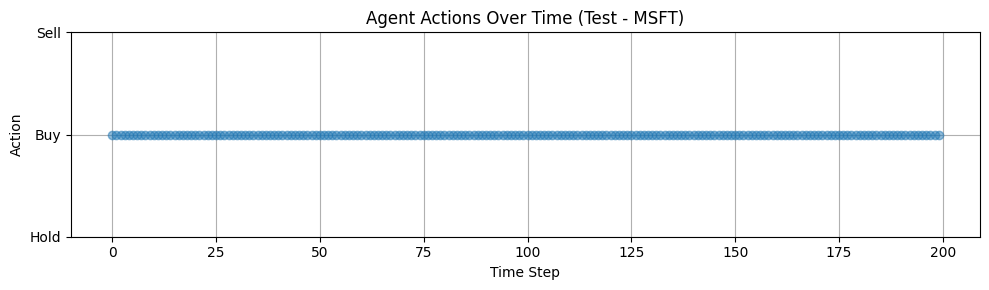

In [9]:
# ==== Record actions during your test roll‑out ====
actions = []
state = env_test.reset()
for _ in range(env_test.max_steps):
    # Select greedy action from policy network
    action = policy_net(
        torch.tensor(state, dtype=torch.float32)
              .unsqueeze(0).to(device)
    ).argmax().item()
    actions.append(action)
    state, _, done, _ = env_test.step(action)
    if done:
        break

# ==== Print action counts ====
from collections import Counter
counts = Counter(actions)
print("Action counts on test run:", counts)
# Example output: Counter({0: 152, 1: 28, 2: 20})

# ==== Plot actions over time ====
plt.figure(figsize=(10, 3))
plt.plot(actions, marker='o', linestyle='', alpha=0.5)
plt.yticks([0, 1, 2], ["Hold", "Buy", "Sell"])
plt.title("Agent Actions Over Time (Test - MSFT)")
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipython-input-10-3866464943.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Episode 1/500, Total Reward: 329.45
Episode 2/500, Total Reward: 208.05
Episode 3/500, Total Reward: 648.71
Episode 4/500, Total Reward: 192.66
Episode 5/500, Total Reward: 93.09
Episode 6/500, Total Reward: 85.36
Episode 7/500, Total Reward: 260.37
Episode 8/500, Total Reward: 407.81
Episode 9/500, Total Reward: 503.37
Episode 10/500, Total Reward: 666.00
Episode 11/500, Total Reward: 333.22
Episode 12/500, Total Reward: 122.75
Episode 13/500, Total Reward: 700.36
Episode 14/500, Total Reward: 574.87
Episode 15/500, Total Reward: 115.53
Episode 16/500, Total Reward: 624.61
Episode 17/500, Total Reward: 670.18
Episode 18/500, Total Reward: 341.35
Episode 19/500, Total Reward: 598.98
Episode 20/500, Total Reward: 317.26
Episode 21/500, Total Reward: 352.88
Episode 22/500, Total Reward: 243.21
Episode 23/500, Total Reward: 285.32
Episode 24/500, Total Reward: 151.71
Episode 25/500, Total Reward: 214.59
Episode 26/500, Total Reward: 313.14
Episode 27/500, Total Reward: 366.55
Episode 28/5

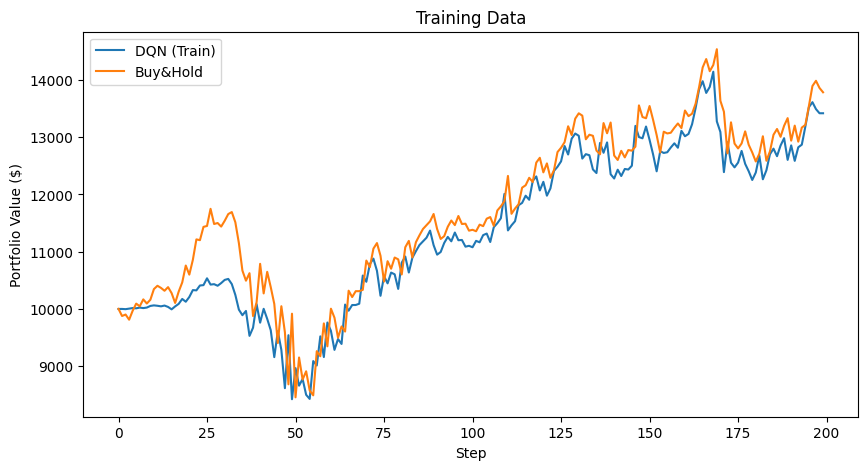

/tmp/ipython-input-10-3866464943.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


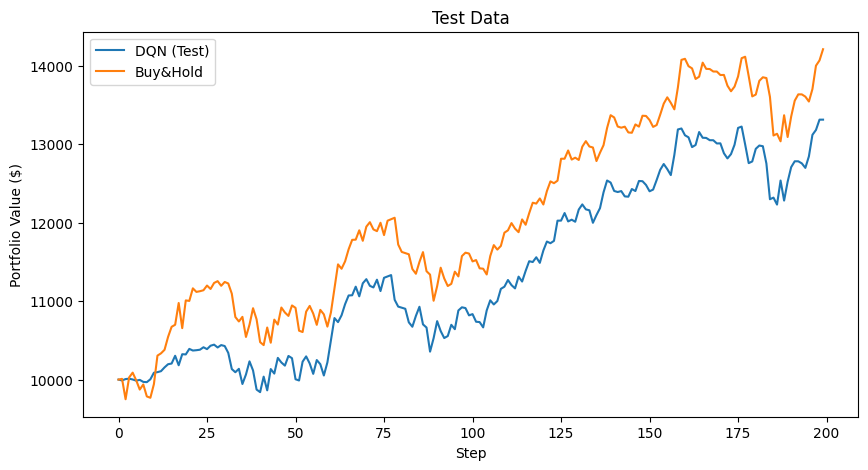

In [10]:
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import gym
from gym import spaces
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import yfinance as yf

# 2. Data Fetching and Indicator Computation (with extra features)

def fetch_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    return df

def add_indicators(df, window_sma=10, window_ema=10, window_rsi=14):
    df['SMA'] = df['Close'].rolling(window=window_sma).mean()
    df['EMA'] = df['Close'].ewm(span=window_ema, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=window_rsi).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window_rsi).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['Ret1'] = df['Close'].pct_change(1)
    df['Ret5'] = df['Close'].pct_change(5)
    df['VolAvg'] = df['Volume'].rolling(window=5).mean()
    df.bfill(inplace=True)
    return df

# 3. Trading Environment with Reward Shaping and Trade Penalty

class TradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, df, initial_balance=10000, max_steps=200, bonus=0.1, trade_penalty=0.1):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.max_steps = min(max_steps, len(df) - 1)
        self.bonus = bonus
        self.trade_penalty = trade_penalty

        self.action_space = spaces.Discrete(3)  # hold, buy, sell
        obs_low = np.array([0, 0, 0, 0, -1, -1, 0, 0, 0], dtype=np.float32)
        obs_high= np.array([np.inf, np.inf, np.inf, 100, 1, 1, np.inf, np.inf, np.inf], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

    def reset(self):
        self.balance = float(self.initial_balance)
        self.net_worth = float(self.initial_balance)
        self.shares_held = 0
        self.current_step = 0
        return self._get_obs()

    def _get_obs(self):
        row = self.df.loc[self.current_step]
        return np.array([
            float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) else float(row['Close']),
            float(row['SMA'].iloc[0]) if isinstance(row['SMA'], pd.Series) else float(row['SMA']),
            float(row['EMA'].iloc[0]) if isinstance(row['EMA'], pd.Series) else float(row['EMA']),
            float(row['RSI'].iloc[0]) if isinstance(row['RSI'], pd.Series) else float(row['RSI']),
            float(row['Ret1'].iloc[0]) if isinstance(row['Ret1'], pd.Series) else float(row['Ret1']),
            float(row['Ret5'].iloc[0]) if isinstance(row['Ret5'], pd.Series) else float(row['Ret5']),
            float(row['VolAvg'].iloc[0]) if isinstance(row['VolAvg'], pd.Series) else float(row['VolAvg']),
            float(self.shares_held),
            float(self.balance)
        ], dtype=np.float32)

    def step(self, action):
        row = self.df.loc[self.current_step]
        price = float(row['Close'].iloc[0]) if isinstance(row['Close'], pd.Series) else float(row['Close'])
        prev_net_worth = self.net_worth

        trade_cost = 0.0
        if action == 1 and self.balance >= price:
            self.shares_held += 1
            self.balance -= price
            trade_cost += self.trade_penalty
        elif action == 2 and self.shares_held > 0:
            self.shares_held -= 1
            self.balance += price
            trade_cost += self.trade_penalty

        self.current_step += 1
        done = self.current_step >= self.max_steps

        if not done:
            next_row = self.df.loc[self.current_step]
            next_price = float(next_row['Close'].iloc[0]) if isinstance(next_row['Close'], pd.Series) else float(next_row['Close'])
            self.net_worth = self.balance + self.shares_held * next_price
            # Reward shaping based on price movement
            reward = self.net_worth - prev_net_worth
            if action == 1 and next_price > price:
                reward += self.bonus
            if action == 2 and next_price < price:
                reward += self.bonus
        else:
            # At the end of the episode, net worth is calculated with the current price
            self.net_worth = self.balance + self.shares_held * price
            reward = self.net_worth - prev_net_worth


        reward -= trade_cost

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Balance: {self.balance:.2f}, Shares: {self.shares_held}, Net Worth: {self.net_worth:.2f}")

# 4. Define DQN Agent

class DQN(nn.Module):
    def __init__(self, input_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.memory = deque(maxlen=capacity)
    def push(self, *args):
        self.memory.append(Transition(*args))
    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    def __len__(self):
        return len(self.memory)

# 5. Training Loop

episode_count = 500
nb_steps = 200
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.05
epsilon_decay = 2000
batch_size = 64
target_update = 10

# Prepare training data and env
df = fetch_data('MSFT', '2020-01-01', '2021-01-01')
df = add_indicators(df)
env = TradingEnv(df, bonus=0.1, trade_penalty=0.1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
policy_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net = DQN(env.observation_space.shape[0], env.action_space.n).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(policy_net.parameters(), lr=1e-3)
memory = ReplayBuffer()
steps_done = 0

def select_action(state):
    global steps_done
    eps = epsilon_end + (epsilon_start - epsilon_end) * np.exp(-1. * steps_done / epsilon_decay)
    steps_done += 1
    if random.random() < eps:
        return random.randrange(env.action_space.n)
    with torch.no_grad():
        return policy_net(torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()

for ep in range(1, episode_count+1):
    state = env.reset()
    total_reward = 0
    for t in range(nb_steps):
        action = select_action(state)
        next_state, reward, done, _ = env.step(action)
        memory.push(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if len(memory) >= batch_size:
            batch = Transition(*zip(*memory.sample(batch_size)))
            s_b = torch.tensor(batch.state, dtype=torch.float32).to(device)
            a_b = torch.tensor(batch.action).unsqueeze(1).to(device)
            r_b = torch.tensor(batch.reward).unsqueeze(1).to(device)
            ns_b = torch.tensor(batch.next_state, dtype=torch.float32).to(device)
            d_b = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)
            q = policy_net(s_b).gather(1, a_b)
            qn = target_net(ns_b).max(1)[0].detach().unsqueeze(1)
            y = r_b + gamma * qn * (1.0 - d_b)
            loss = nn.MSELoss()(q, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if done:
            break
    if ep % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())
    print(f"Episode {ep}/{episode_count}, Total Reward: {total_reward:.2f}")

# 6. Evaluation on Training Data

state = env.reset()
vals = []
s = state
for _ in range(env.max_steps):
    a = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env.step(a)
    vals.append(env.net_worth)
    if done:
        break

plt.figure(figsize=(10,5))
plt.plot(range(len(vals)), vals, label='DQN (Train)')
bh = df['Close'].iloc[:len(vals)].values
bhv = bh / bh[0] * env.initial_balance
plt.plot(range(len(bhv)), bhv, label='Buy&Hold')
plt.legend()
plt.title('Training Data')
plt.xlabel('Step')
plt.ylabel('Portfolio Value ($)')
plt.show()

# 7. Evaluation on Test Data

df_test = fetch_data('MSFT', '2021-01-02', '2022-01-01')
df_test = add_indicators(df_test)
env_test = TradingEnv(df_test, bonus=0.1, trade_penalty=0.1)

state = env_test.reset()
vals_test = []
s = state
for _ in range(env_test.max_steps):
    a = policy_net(torch.tensor(s, dtype=torch.float32).unsqueeze(0).to(device)).argmax().item()
    s, _, done, _ = env_test.step(a)
    vals_test.append(env_test.net_worth)
    if done:
        break

plt.figure(figsize=(10,5))
plt.plot(range(len(vals_test)), vals_test, label='DQN (Test)')
bh = df_test['Close'].iloc[:len(vals_test)].values
bhv = bh / bh[0] * env_test.initial_balance
plt.plot(range(len(bhv)), bhv, label='Buy&Hold')
plt.legend()
plt.title('Test Data')
plt.xlabel('Step')
plt.ylabel('Portfolio Value ($)')
plt.show()

Action counts on test run: Counter({1: 200})


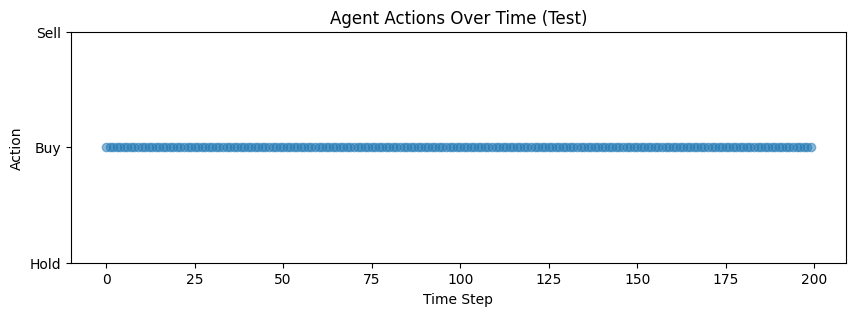

In [11]:
# ==== Record actions during your test roll‑out ====
actions = []
state = env_test.reset()
for _ in range(env_test.max_steps):
    # select greedy action
    action = policy_net(
        torch.tensor(state, dtype=torch.float32)
             .unsqueeze(0).to(device)
    ).argmax().item()
    actions.append(action)
    state, _, done, _ = env_test.step(action)
    if done:
        break

# ==== Print counts ====
from collections import Counter
counts = Counter(actions)
print("Action counts on test run:", counts)
# e.g. Counter({0: 150, 1: 25, 2: 25})

# ==== (Optional) Plot actions over time ====
plt.figure(figsize=(10,3))
plt.plot(actions, marker='o', linestyle='', alpha=0.5)
plt.yticks([0,1,2], ["Hold","Buy","Sell"])
plt.title("Agent Actions Over Time (Test)")
plt.xlabel("Time Step")
plt.ylabel("Action")
plt.show()


In [12]:
# ## 2. Data Fetching and Indicator Computation

# %%
def fetch_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    return df

# %%
def add_indicators(df, window_sma=20, window_ema=21, window_rsi=12):
    df['SMA'] = df['Close'].rolling(window=window_sma).mean()
    df['EMA'] = df['Close'].ewm(span=window_ema, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=window_rsi).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window_rsi).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    # MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df.bfill(inplace=True)
    return df

# ## 3. Define Trading Environment with Reward Shaping

# %%
class TradingEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self, df, initial_balance=10000, max_steps=200, trade_penalty=0.1):
        super(TradingEnv, self).__init__()
        self.df = df.reset_index(drop=True)
        self.initial_balance = float(initial_balance)
        self.max_steps = min(max_steps, len(df) - 1)
        self.trade_penalty = trade_penalty

        # Actions: 0 = hold, 1 = buy 1 share, 2 = sell 1 share
        self.action_space = spaces.Discrete(3)
        # Observation: [Close, SMA, EMA, RSI, MACD, holdings, cash]
        obs_low = np.array([0, 0, 0, 0, -np.inf, 0, 0], dtype=np.float32)
        obs_high = np.array([np.inf, np.inf, np.inf, 100, np.inf, np.inf, np.inf], dtype=np.float32)
        self.observation_space = spaces.Box(obs_low, obs_high, dtype=np.float32)

    def reset(self):
        self.balance = float(self.initial_balance)
        self.net_worth = float(self.initial_balance)
        self.shares_held = 0
        self.current_step = 0
        return self._get_obs()

    def _get_obs(self):
        row = self.df.loc[self.current_step]
        return np.array([
            float(row['Close']),
            float(row['SMA']),
            float(row['EMA']),
            float(row['RSI']),
            float(row['MACD']),
            float(self.shares_held),
            float(self.balance)
        ], dtype=np.float32)

    def step(self, action):
        row = self.df.loc[self.current_step]
        price = float(row['Close'].iloc[0]) # Ensure price is a float
        prev_net_worth = self.net_worth

        if action == 1 and self.balance >= price:
            self.shares_held += 1
            self.balance -= price
        elif action == 2 and self.shares_held > 0:
            self.shares_held -= 1
            self.balance += price

        self.current_step += 1
        done = self.current_step >= self.max_steps
        # Access the scalar value using .iloc[0]
        self.net_worth = self.balance + self.shares_held * float(self.df.loc[self.current_step]['Close'].iloc[0])
        reward = self.net_worth - prev_net_worth

        return self._get_obs(), reward, done, {}

    def render(self, mode='human'):
        print(f"Step: {self.current_step}, Balance: {self.balance:.2f}, Shares: {self.shares_held}, Net Worth: {self.net_worth:.2f}")